In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
nb_classes = 10

In [5]:
keep_prob = tf.placeholder(tf.float32)

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [7]:
W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

In [8]:
W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

In [9]:
W3 = tf.get_variable("W3", shape=[512, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.matmul(layer2, W3) + b3

In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [11]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [12]:
training_epochs = 15
batch_size = 100

Epoch: 0001 cost = 0.602262420
Epoch: 0002 cost = 0.277753065
Epoch: 0003 cost = 0.214394790
Epoch: 0004 cost = 0.173967173
Epoch: 0005 cost = 0.149379809
Epoch: 0006 cost = 0.130868836
Epoch: 0007 cost = 0.116684775
Epoch: 0008 cost = 0.107496868
Epoch: 0009 cost = 0.096231633
Epoch: 0010 cost = 0.087955382
Epoch: 0011 cost = 0.083666227
Epoch: 0012 cost = 0.077985586
Epoch: 0013 cost = 0.073966538
Epoch: 0014 cost = 0.068273864
Epoch: 0015 cost = 0.063958627
Accuracy: 0.9805
Label:  [2]
Prediction: [2]


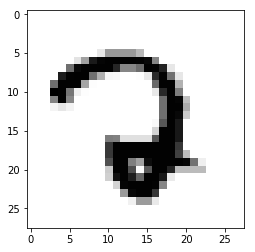

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7})
            avg_cost += c / total_batch
        print('Epoch: {:04d} cost = {:.9f}'.format((epoch + 1), avg_cost))
    print("Accuracy:", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1], keep_prob: 1}))

    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap="Greys", interpolation="nearest")
    plt.show()